### Table of Contents

1. [Rabi Oscillations](#Rabi-Oscillations)
    1. [Simulating the Full Hamiltonian](#Simulating-the-Full-Hamiltonian)
    2. [With Rotating Wave Approximation](#With-Rotating-Wave-Approximation)
        1. [With $\gamma_1$ collapse](#With-$\gamma_1$-collapse)
        2. [With $\gamma_2$ collapse](#With-$\gamma_2$-collapse)
2. [Coherent State in a Harmonic Oscillator](#Coherent-State-in-a-Harmonic-Oscillator)

In [1]:
from cutiepy import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# TODO: implement sparse Lindblad operator
cutiepy.operators.SPARSITY_N_CUTOFF = 60

# Rabi Oscillations

$\hat{H} = \hat{H}_0 + \Omega \sin((\omega_0+\Delta)t) \hat{\sigma}_x$

$\hat{H}_0 = \frac{\omega_0}{2}\hat{\sigma}_z$

In [2]:
initial_state = basis(2, 0)
initial_state

'{0}_{\\tiny N\\normalsize 2}'

In [3]:
ω0 = 1
Δ = 0.002
Ω = 0.005
ts = 6*np.pi/Ω*np.linspace(0,1,120)
H = ω0/2 * sigmaz() + Ω * sigmax() * sin((ω0+Δ)*t)
H

Add(Mul(0.5, 'σ_z'), Mul(0.005, sin(Mul(1.002, 't')), 'σ_x'))

In [4]:
res = mesolve(H, [], initial_state, ts)

Generating cython code...
Compiling cython code...
Running cython code...
Starting at 10/25 15:52:02.
Finishing at 10/25 15:52:03.
Total time: 0 seconds.
Formatting the output...


In [5]:
σz_expect = expect(sigmaz(), res)

In [6]:
res[20]

'30e67746-c19b-469d-85c5-b359cd71330e'

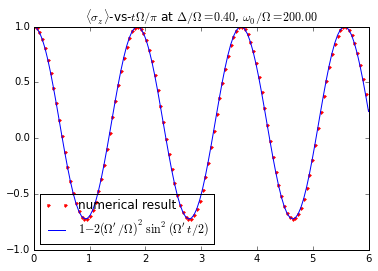

In [7]:
plt.plot(ts*Ω/np.pi, σz_expect, 'r.', label='numerical result')
Ωp = (Ω**2+Δ**2)**0.5
plt.plot(ts*Ω/np.pi, 1-(Ω/Ωp)**2*2*np.sin(Ωp*ts/2)**2, 'b-',
         label=r'$1-2(\Omega^\prime/\Omega)^2\sin^2(\Omega^\prime t/2)$')
plt.title(r'$\langle\sigma_z\rangle$-vs-$t\Omega/\pi$ at '
          r'$\Delta/\Omega=%.2f$, $\omega_0/\Omega=%.2f$'%(Δ/Ω, ω0/Ω))
plt.ylim(-1,1)
plt.legend(loc=3);

## With Rotating Wave Approximation

$\hat{H}^\prime = e^{i\hat{H}_0 t}\hat{H} e^{-i\hat{H}_0 t} \approx \frac{\Delta}{2} \hat{\sigma}_z + \frac{\Omega}{2} \hat{\sigma}_x$

In [8]:
Hp = Δ/2 * sigmaz() + Ω/2 * sigmax()
Hp

Add(Mul(0.0025, 'σ_x'), Mul(0.001, 'σ_z'))

In [9]:
res = mesolve(Hp, [], initial_state, ts)

Generating cython code...
Compiling cython code...
Running cython code...
Starting at 10/25 15:52:10.
Finishing at 10/25 15:52:10.
Total time: 0 seconds.
Formatting the output...


In [10]:
σz_expect = expect(sigmaz(), res)

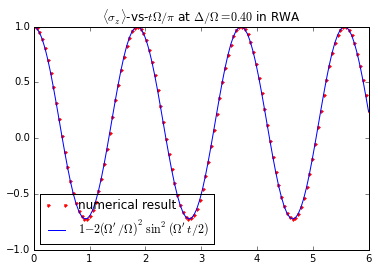

In [11]:
plt.plot(ts*Ω/np.pi, σz_expect, 'r.', label='numerical result')
Ωp = (Ω**2+Δ**2)**0.5
plt.plot(ts*Ω/np.pi, 1-(Ω/Ωp)**2*2*np.sin(Ωp*ts/2)**2, 'b-',
         label=r'$1-2(\Omega^\prime/\Omega)^2\sin^2(\Omega^\prime t/2)$')
plt.title(r'$\langle\sigma_z\rangle$-vs-$t\Omega/\pi$ at '
          r'$\Delta/\Omega=%.2f$ in RWA'%(Δ/Ω))
plt.ylim(-1,1)
plt.legend(loc=3);

### With $\gamma_1$ collapse

In [12]:
γ1 = 0.2*Ω
c1 = γ1**0.5 * sigmam()
c1

Mul(0.03162277660168379, 'σ_-')

In [13]:
res = mesolve(Hp, [c1], initial_state, ts)

Generating cython code...
Compiling cython code...
Running cython code...
Starting at 10/25 15:52:17.
Finishing at 10/25 15:52:17.
Total time: 0 seconds.
Formatting the output...


In [14]:
σz_expect = expect(sigmaz(), res)

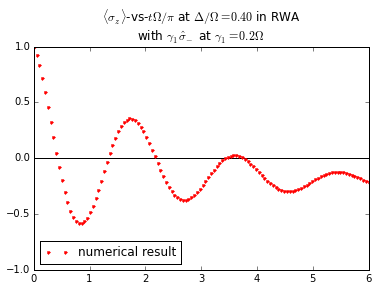

In [15]:
plt.plot(ts*Ω/np.pi, σz_expect, 'r.', label='numerical result')
plt.ylim(-1,1)
plt.title(r'$\langle\sigma_z\rangle$-vs-$t\Omega/\pi$ at '
          r'$\Delta/\Omega=%.2f$ in RWA'%(Δ/Ω) + '\n' +
          r'with $\gamma_1 \hat{\sigma}_-$ at $\gamma_1=0.2\Omega$')
plt.hlines(0,0,ts[-1]*Ω/np.pi)
plt.legend(loc=3);

### With $\gamma_2$ collapse

In [16]:
γ2 = 0.2*Ω
c2 = γ2**0.5 * sigmaz()
c2

Mul(0.03162277660168379, 'σ_z')

In [17]:
res = mesolve(Hp, [c2], initial_state, ts)

Generating cython code...
Compiling cython code...
Running cython code...
Starting at 10/25 15:52:24.
Finishing at 10/25 15:52:24.
Total time: 0 seconds.
Formatting the output...


In [18]:
σz_expect = expect(sigmaz(), res)

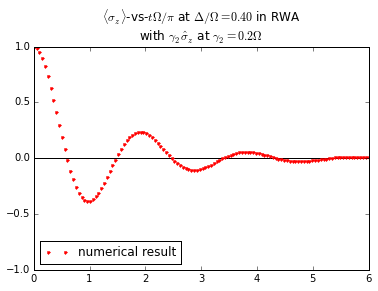

In [19]:
plt.plot(ts*Ω/np.pi, σz_expect, 'r.', label='numerical result')
plt.ylim(-1,1)
plt.title(r'$\langle\sigma_z\rangle$-vs-$t\Omega/\pi$ at '
          r'$\Delta/\Omega=%.2f$ in RWA'%(Δ/Ω) + '\n' +
          r'with $\gamma_2 \hat{\sigma}_z$ at $\gamma_2=0.2\Omega$')
plt.hlines(0,0,ts[-1]*Ω/np.pi)
plt.legend(loc=3);

# Coherent State in a Harmonic Oscillator


$|\alpha\rangle$ evolving under $\hat{H} = \hat{n}$ coupled to a zero temperature heat bath $\kappa = 0.5$

In [20]:
N_cutoff = 40
α = 2.5
initial_state = coherent(N_cutoff, α)
initial_state

'{\\tiny\\alpha\\normalsize 2.50}_{\\tiny N\\normalsize 40}'

In [21]:
H = num(N_cutoff)
H

'{n}_{40}'

In [22]:
κ = 0.5
n_th = 0

c_down = (κ * (1 + n_th))**2 * destroy(N_cutoff)
c_down

Mul(0.25, '{a}_{40}')

In [23]:
ts = 2*np.pi*np.linspace(0,1,41)
res = mesolve(H, [c_down], initial_state, ts)
a = destroy(N_cutoff)
a_expect = expect(a, res, keep_complex=True)

Generating cython code...
Compiling cython code...
Running cython code...
Starting at 10/25 15:52:31.
Finishing at 10/25 15:52:32.
Total time: 0 seconds.
Formatting the output...


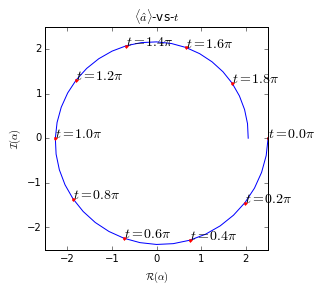

In [24]:
plt.figure(figsize=(4,4))
plt.plot(np.real(a_expect), np.imag(a_expect), 'b-')
for t, alpha in list(zip(ts,a_expect))[:40:4]:
    plt.plot(np.real(alpha), np.imag(alpha), 'r.')
    plt.text(np.real(alpha), np.imag(alpha), r'$t=%.1f\pi$'%(t/np.pi), fontsize=14)
plt.title(r'$\langle\hat{a}\rangle$-vs-$t$')
plt.ylabel(r'$\mathcal{I}(\alpha)$')
plt.xlabel(r'$\mathcal{R}(\alpha)$')
l = abs(a_expect[0])
plt.xlim(-l,l)
plt.ylim(-l,l);